In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [13]:
MODEL_PATH = 'ressources/YOLO Resources/models/'
modelFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = MODEL_PATH + "coco_class_labels.txt"

In [14]:
# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [15]:
with open(classFile) as fp:
    labels = fp.read().split("\n")


In [16]:
# For ach file in the directory
def detect_objects(net, im):
    # Blob dimension (dim x dim)
    dim = 300

    mean = (127.5, 127.5, 127.5)
    
    # The blobFromImage functions will use True for swapRB flag. 
    # This is because Tensorflow uses RGB format whereas Caffe and OpenCV use BGR format.
    swap_rgb = True
    
    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(im, 1.0/127.5, (dim, dim), mean, swap_rgb)
    

    # Pass blob to the network
    net.setInput(blob)
    
    # Peform Prediction
    objects = net.forward()
    return objects


In [17]:
def display_text(im, text, x, y):
    
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a black rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)


In [18]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects(im, objects, threshold = 0.25):

    rows = im.shape[0]; cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Find the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Recover original cordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.show();

In [19]:
! ls data/images

ls: data/images: No such file or directory


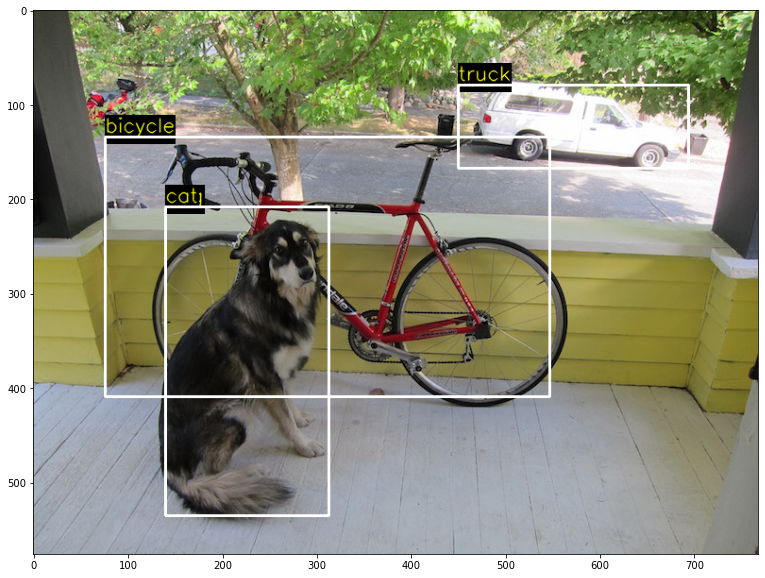

In [20]:
im = cv2.imread('ressources/YOLO Resources/img/dog.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

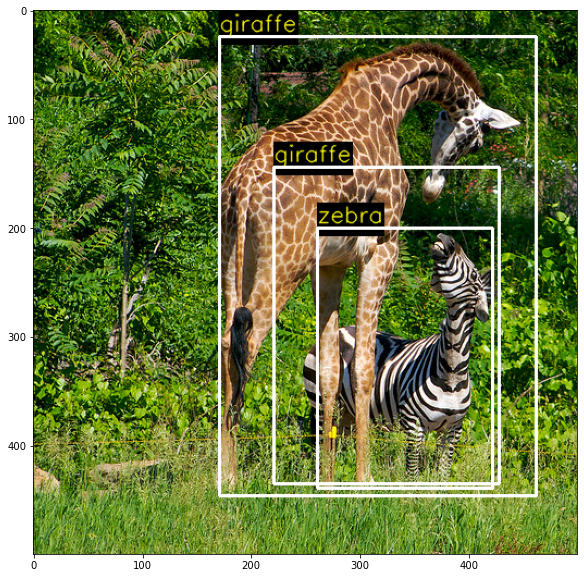

In [21]:
im = cv2.imread('ressources/YOLO Resources/img/giraffe.jpg')
objects = detect_objects(net, im)
display_objects(im, objects, 0.2)

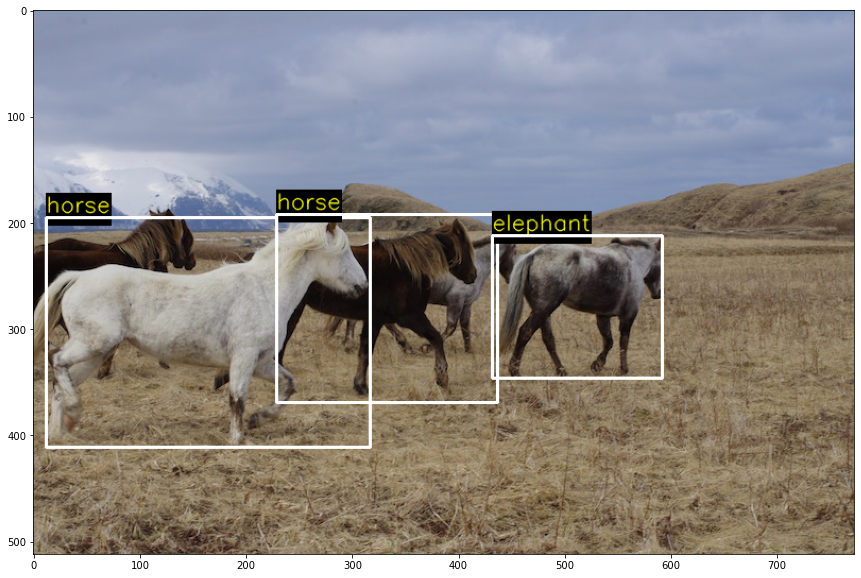

In [22]:
im = cv2.imread('ressources/YOLO Resources/img/horses.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)